In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker

	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'arial',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from scipy.interpolate import interp1d

In [2]:
all_data = np.loadtxt('data/rmsd_ntd_1_68.csv', delimiter=',')

lengths          = all_data.transpose()[0]
rms_distance     = all_data.transpose()[1]
rms_distance_std = all_data.transpose()[2]


distance     = all_data.transpose()[3]
distance_std = all_data.transpose()[4]


/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_87058/3794858974.py:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(lengths, distance,


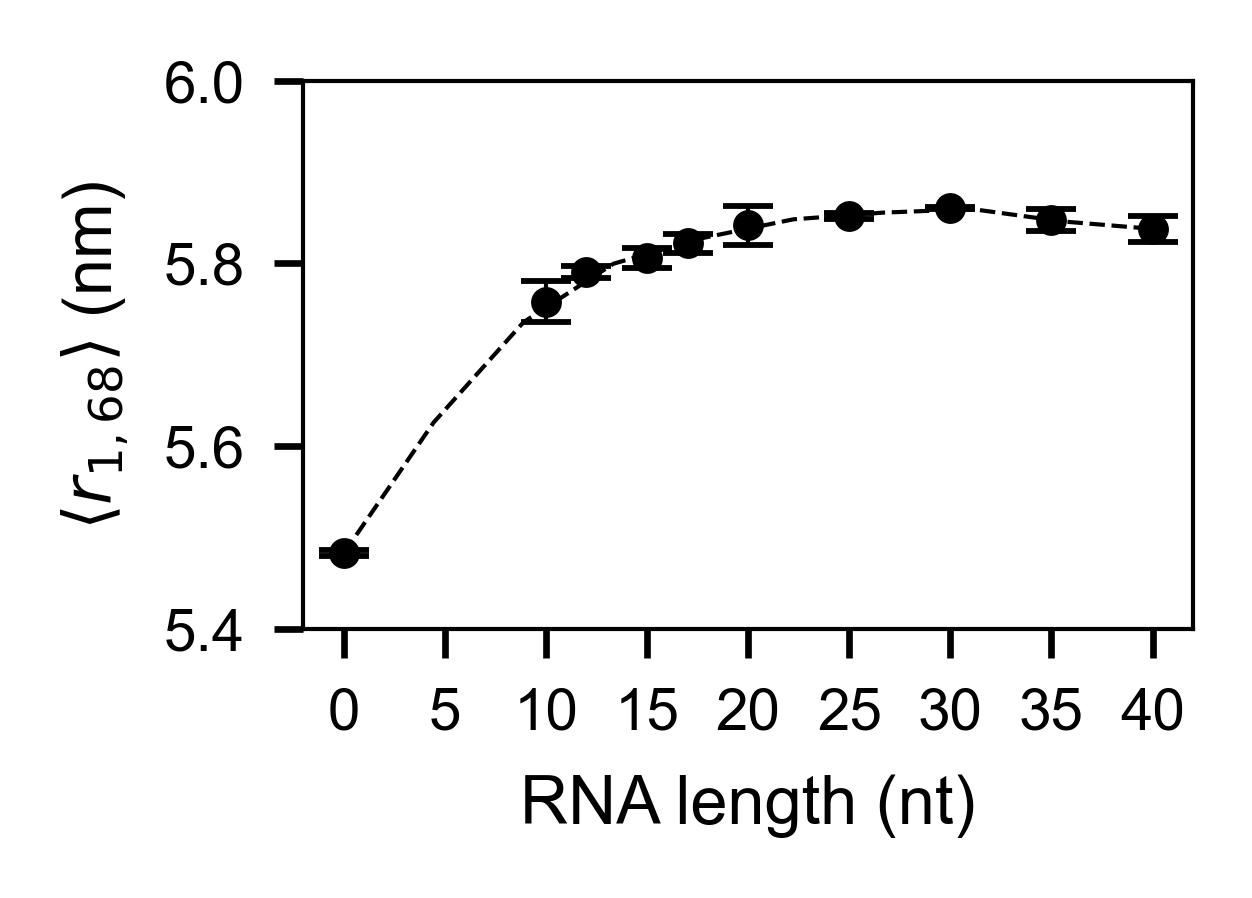

In [3]:

figure(None, (2.2,1.6), dpi=300)

ax = plt.gca()


ax.errorbar(lengths, distance,
             yerr = distance_std, fmt='.k', linewidth=0.3, color = 'k', label='Bound',
             ecolor='k', elinewidth=0.5, capsize=3,markeredgewidth=0.7)



x_new = np.linspace(np.min(lengths), np.max(lengths),10)
f = interp1d(x = lengths, y = distance, kind='quadratic')
y_smooth=f(x_new)
plt.plot(x_new,y_smooth, color = "k", linestyle='dashed', linewidth=.5)


plt.ylabel(r'$\langle r_{1,68} \rangle$ (nm)',fontsize=8)
plt.xlabel('RNA length (nt)',fontsize=8)

tick_spacing = .2
#plt.yticks(np.arange(np.arange(53,58), 1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

tick_spacing = 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#plt.legend(fontsize=7, frameon=False)


plt.ylim([5.4, 6.])
plt.tight_layout()
plt.savefig('r_1_68_ensemble_average.pdf')



/var/folders/2n/xtzsyspd32v6vglg_pd5gmw80000gn/T/ipykernel_87058/1031524260.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string ".k" (-> color='k'). The keyword argument will take precedence.
  ax.errorbar(lengths, rms_distance,


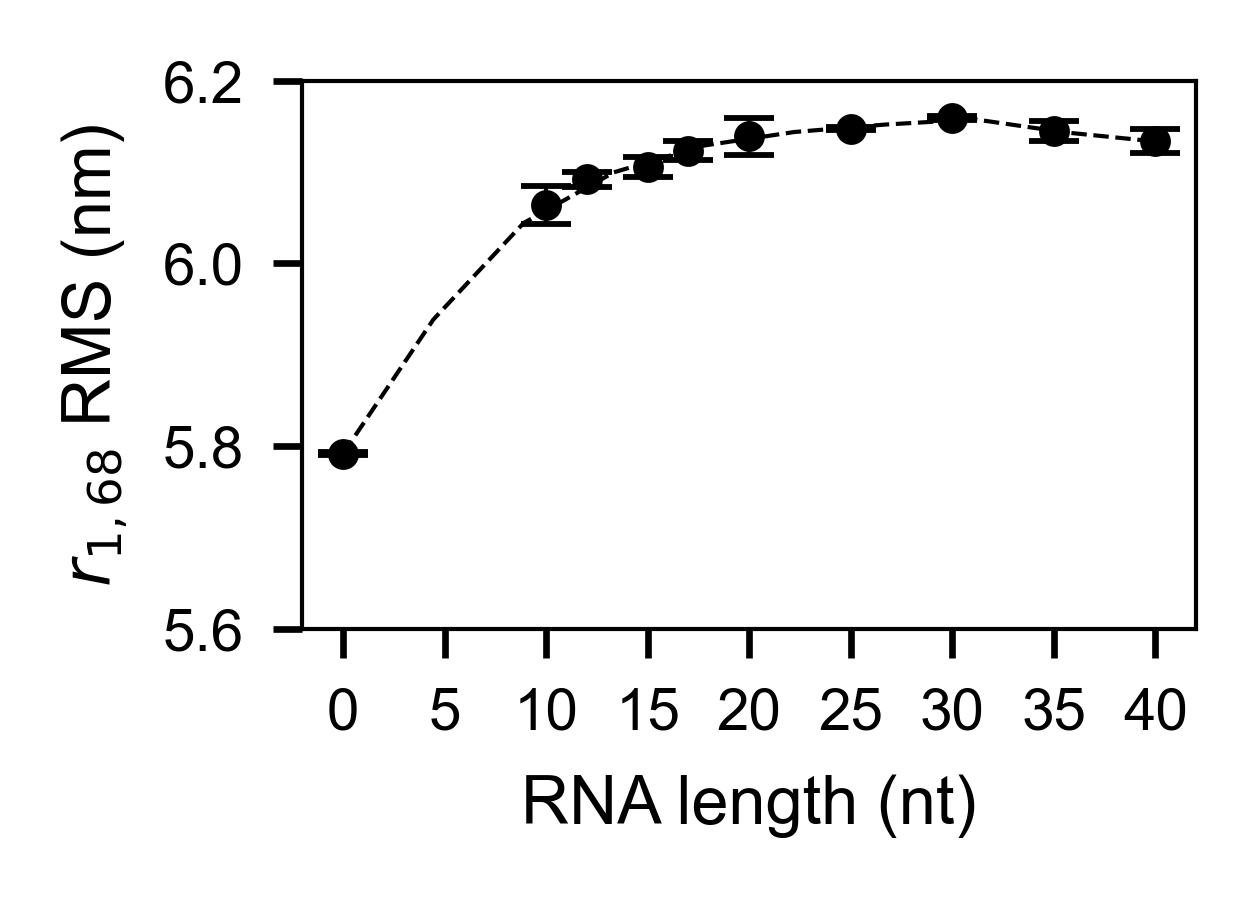

In [4]:

figure(None, (2.2,1.6), dpi=300)

ax = plt.gca()

ax.errorbar(lengths, rms_distance,
             yerr = rms_distance_std, fmt='.k', linewidth=0.3, color = 'k', label='Bound',
             ecolor='k', elinewidth=0.5, capsize=3,markeredgewidth=0.7)



x_new = np.linspace(np.min(lengths), np.max(lengths),10)
f = interp1d(x = lengths, y = rms_distance, kind='quadratic')
y_smooth=f(x_new)
plt.plot(x_new,y_smooth, color = "Black", linestyle='dashed', linewidth=.5)




plt.ylabel(r'$r_{1,68}$ RMS (nm)',fontsize=8)
plt.xlabel('RNA length (nt)',fontsize=8)

tick_spacing = .2
#plt.yticks(np.arange(np.arange(53,58), 1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

tick_spacing = 5
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
#plt.legend(fontsize=7, frameon=False)


plt.ylim([5.6, 6.2])
plt.tight_layout()
plt.savefig('RMS_r_1_68.pdf')

